In [1]:
import numpy as np
import os
# Set the new path
new_path = "/Users/wty6162/Desktop/DRO_solver/dro"
# Change the current working directory
os.chdir(new_path)
from dro.src.linear_model.chi2_dro import *
from dro.src.linear_model.Wasserstein_DRO import *


# Classification Task

## Load Data

In [3]:
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
# draw_classification(X, y, title = 'Raw Data')

## Model Fit
Recall $X$ being the feature and $Y$ being the outcome, we allow both $Y = \theta^{\top}X$ and $Y = \theta^{\top}X + b$ by setting ``fit_intercept`` (default = True).

In [3]:
clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'svm')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

{'theta': [-0.027927464931475895, 0.33540663380376556], 'b': 0}

## Worst-case Distribution and Visualization
For SVM / Logistic / LAD, we provide two different worst-case distribution computations, 1 stands for asymptotic approximation, 2 stands for the exact calculation while requiring solving n optimization problems.

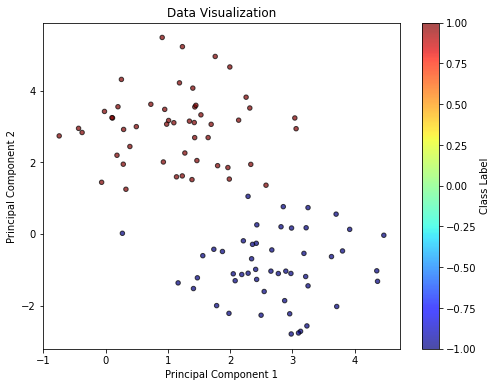

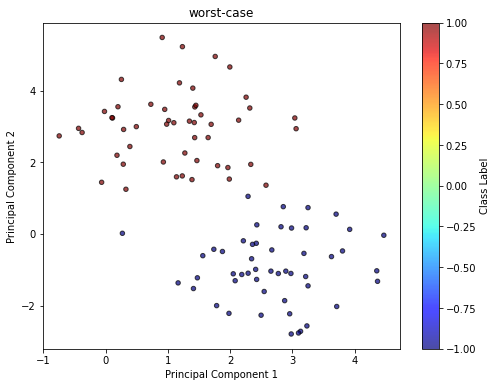

In [5]:
worst_case_log = clf_model1.worst_distribution(X, y, 2)
draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')


## Robust Satisificng version of Wasserstein DRO
 

In [4]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

clf_model_rs = Wasserstein_DRO_satisficing(input_dim = 2, model_type = 'svm')
clf_model_rs.fit(X, y)


{'theta': [-0.3365834154114554, 6.700882661679504]}

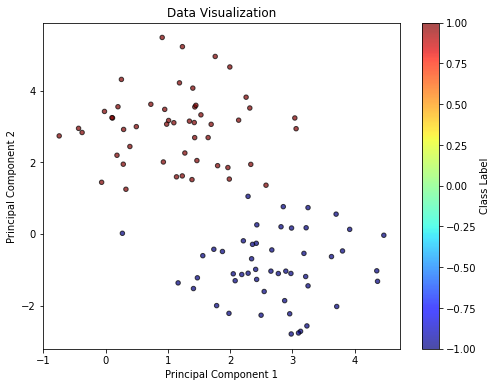

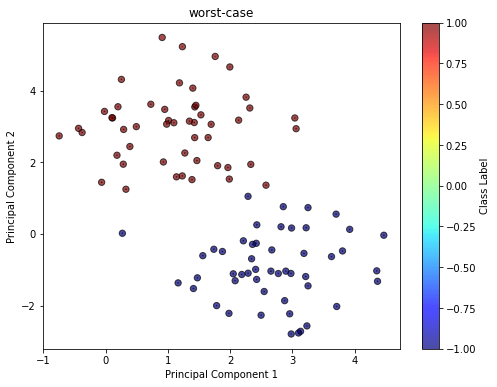

In [3]:
import numpy as np
import os
os.chdir('/Users/wty6162/Desktop/DRO_solver')
from dro.src.linear_model.Wasserstein_DRO import *

from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification

X, y = classification_basic(d = 2, num_samples = 100, radius = 3, visualize = False)
# draw_classification(X, y, title = 'Raw Data')

clf_model1 = WassersteinDRO(input_dim = 2, model_type = 'logistic')
clf_model1.fit_intercept = False
clf_model1.update({'eps': 1.5, 'p': 'inf', 'kappa': 10})
clf_model1.fit(X, y)

worst_case_log = clf_model1.worst_distribution(X, y, 1)

draw_classification(X, y)
draw_classification(worst_case_log['sample_pts'][0], worst_case_log['sample_pts'][1], weight = worst_case_log['weight'], title = 'worst-case')

# Regression Task
We can construct similar models for Wasserstein DRO regression models, including ``lad`` and ``ols`` loss.

In [1]:
import numpy as np
import os
# Set the new path
new_path = "/Users/wty6162/Desktop/DRO_solver/dro"
# Change the current working directory
os.chdir(new_path)

from dro.src.linear_model.Wasserstein_DRO import *
from dro.src.data.dataloader_regression import regression_basic

feature_dim = 5
X, y = regression_basic(num_samples = 100, d = feature_dim, noise = 1)

reg_model = WassersteinDRO(input_dim = feature_dim, model_type = 'lad')

costM = np.identity(feature_dim)
costM[0][0] = 1
reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 0.001})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':2, 'kappa': 'inf'})
print(reg_model.fit(X, y))

reg_model.update({'cost_matrix': costM, 'eps': 1, 'p':1, 'kappa': 'inf'})
print(reg_model.fit(X, y))


{'theta': [60.7303464138377, 98.62687565803654, 64.38050744405149, 56.75157019658432, 35.640142487772366], 'b': array(-0.01686764)}
{'theta': [3.4783661483942014e-12, 4.992166187711158e-12, 2.3187141220532602e-12, 3.208951173994725e-12, 1.6087099494994484e-12], 'b': array(5.90939031)}
{'theta': [57.46100670756033, 57.4610067082435, 57.46100670762734, 57.4610067069542, 34.68007874611299], 'b': array(5.37018113)}


In [6]:
reg_model.kappa not in ['inf', np.inf]

False

In [2]:
reg_model.worst_distribution(X, y, 1)

{'sample_pts': [array([[ 9.75119733e-01, -6.77161712e-01, -1.22467728e-02,
          -8.97254371e-01,  7.58045582e-02],
         [ 8.18741394e-02, -4.85363548e-01,  7.58969220e-01,
          -7.72825215e-01, -2.36818607e-01],
         [-1.41230370e+00, -9.08024076e-01, -5.62287529e-01,
          -1.01283112e+00,  3.14247333e-01],
         [-6.45119755e-01,  3.61636025e-01,  1.35624003e+00,
          -7.20101216e-02,  1.00353290e+00],
         [-6.22699520e-01,  2.80991868e-01, -1.95208780e+00,
          -1.51785095e-01,  5.88317206e-01],
         [-4.50065471e-01,  4.69805938e-02, -1.59442766e+00,
          -5.99375023e-01,  5.24369972e-03],
         [ 7.74634053e-01,  4.43819428e-01, -4.84234073e-01,
           1.26691115e+00, -7.07669466e-01],
         [ 3.57015486e-01,  8.49602097e-01, -2.08122250e-01,
          -4.93000935e-01, -5.89364757e-01],
         [-1.30446950e+00, -8.91200395e-02,  3.84065449e-01,
          -3.26947481e-02, -2.06744210e+00],
         [ 1.73180926e-01, -1.24